# CAP 781 
# K Nearest Neighbour Classification

<br>

## Diabetes Dataset

The diabetes data, which is collected by [National Institute of Diabetes and Digestive and Kidney Diseases](https://www.niddk.nih.gov/), consists of demographic and clinical information about 768 patients, where 264 of them have been tested positive for diabetes. 

In the data set:

  - `Diabetic` column contains the value **0** for patients who tested **negative for diabetes**, and **1** for patients who **tested positive**.
  - `Pregnancies`, 
  - `PlasmaGlucose`, 
  - `DiastolicBloodPressure`, 
  - `TricepsThickness`, 
  - `SerumInsulin`, 
  - `BMI`, 
  - `DiabetesPedigree` and 
  - `Age` are the **features** that can be used to predict the `Diabetic` label of the patients.

In [37]:
#import the data set

import pandas as pd

diabetes_df = pd.read_csv("datasets/Diabetes.csv")

In [38]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes_df.shape

(768, 9)

In [40]:
#there are some inconsistent values in the data set. I removed patients whose bmi and glucose are both zero
diabetes_df = diabetes_df[(diabetes_df.bmi!=0) & (diabetes_df.glucose!=0)]

In [41]:
diabetes_df.shape

(752, 9)

Let's visualize our Diabetes dataset based on the first two features `bmi` and `glucose` with respect to `diabetes` status of the patients.

In [42]:
#Prepare X and y
X = diabetes_df[["bmi","glucose"]]
y = diabetes_df[["diabetes"]]

In [43]:
y.value_counts()

diabetes
0           488
1           264
dtype: int64

Let's first split the data as train and test sets. However, to keep the class balance (ratio of 1's to 0's) both in training and test data, we should set `stratify=y` in `train_test_split`.

In [44]:
#first split the data as train and test. Use stratify so that the ratio of 0's to 1's in train data equals to that of in test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1773, stratify=y)

In [45]:
y_train.value_counts()

diabetes
0           390
1           211
dtype: int64

In [46]:
#check
print("Ratio of 0's to 1's in the training set: %.4f" % (y_train.value_counts()[0]/y_train.value_counts()[1]))

Ratio of 0's to 1's in the training set: 1.8483


In [47]:
y_test.value_counts()

diabetes
0           98
1           53
dtype: int64

In [48]:
#check
print("Ratio of 0's to 1's in the test set: %.4f" % (y_test.value_counts()[0]/y_test.value_counts()[1]))

Ratio of 0's to 1's in the test set: 1.8491


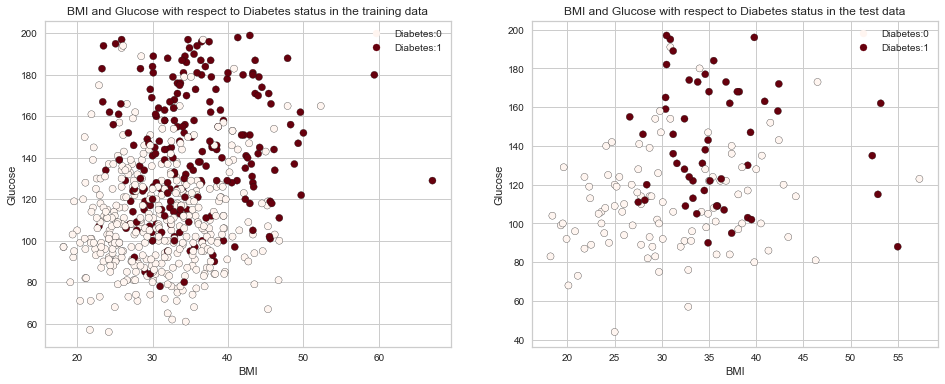

In [49]:
#visualize the train and test data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)

#left plot
p1 = ax1.scatter(X_train.bmi, X_train.glucose, c=y_train.diabetes, edgecolor='k', s=50, cmap="Reds")            
ax1.set_xlabel('BMI')
ax1.set_ylabel('Glucose')
ax1.set_title('BMI and Glucose with respect to Diabetes status in the training data')
ax1.legend(handles=p1.legend_elements()[0], labels=['Diabetes:0', 'Diabetes:1'], loc='upper right')

#right plot
p2 = ax2.scatter(X_test.bmi, X_test.glucose, c=y_test.diabetes, edgecolor='k', s=50, cmap="Reds")            
ax2.set_xlabel('BMI')
ax2.set_ylabel('Glucose')
ax2.set_title('BMI and Glucose with respect to Diabetes status in the test data')
ax2.legend(handles=p2.legend_elements()[0], labels=['Diabetes:0', 'Diabetes:1'], loc='upper right')

plt.show();

We can see that patients whose BMI and Glucose levels are high are more likely to develop diabetes.

<br>

## A Simple Classification Algorithm: K-Nearest Neighbors (K-NN) Algorithm

-  Suppose we are given a training dataset $\mathcal{D} = \{(\mathbf{x}_{1}, y_{1}), (\mathbf{x}_{2}, y_{2}), \ldots, (\mathbf{x}_{n}, y_{n})\}$ where
$y_{i} \in \{c_1,\ldots,c_k,\ldots,c_K\}$. 

- At inference time, we receive a `new feature vector` $\mathbf{x}_{n+1}$ and we want to **predict its class label** $y_{n+1}$.
-  The K-NN first calculates the `distance` between the unseen feature vector $\mathbf{x}_{n+1}$ and each feature vector $\mathbf{x}_i$ available in training dataset $\mathcal{D}$ through:

\begin{equation}
d_i=d(\mathbf{x}_{n+1},\mathbf{x}_i),  \nonumber
\end{equation}

-   where $i=1, \ldots, n$.
-   Then among the set of distances $(d_1,\ldots,d_{n})$, the K-NN classifier identifies the $K$ points that are **closest** to $\mathbf{x}_{n+1}$:


\begin{equation}
\mathbb{N}_{K}(\mathbf{x}_{n+1})=\big\{\mathbf{x}_i: d(\mathbf{x}_{n+1},\mathbf{x}_i)  \leq d_{(K)}\big\},
\nonumber
\end{equation}

-   where $d_{(K)}$ is the $K$th smallest value of $(d_1,\ldots,d_{n})$.

<br>

![](images/knn.png)

-   Then, K-NN **estimates** the probability that $y_{n+1}$ belongs to the class $c_{l}$ given the feature vector $\mathbf{x}_{n+1}$ as the fraction of points in $\mathbb{N}_{K}$ whose response values equal $c_{l}$ (**voting rule**):

\begin{equation}
Pr(y_{n+1}=c_l \vert \mathbf{x}_{n+1})=\frac{1}{K}\sum_{i \in \mathbb{N}_{K}}I(y_i=c_l).
\nonumber
\end{equation}

-   for $c_l \in {c_1,\ldots,c_k,\ldots,c_K}$.
-   Then, K-NN classifies the future observation $\mathbf{x}_{n+1}$ to the class with the largest probability (`majority voting rule`):


\begin{equation}
c_k = \underset{(c_l \in \{c_1,\ldots,c_k,\ldots,c_K \})}{argmax} Pr(y_{n+1}=c_l \vert \mathbf{x}_{n+1}). \nonumber
\end{equation}

## Illustration

-   Please watch the following:

<https://machinelearningknowledge.ai/wp-content/uploads/2021/07/Sklearn-KNN-Classifier.gif>

## Choosing a Distance Function

How do we select the training point $\mathbf{x}_i$ $(i=1,\ldots,n)$ that is the closest to the new point $\mathbf{x}_{n+1}$? 

### Minkowski Distance

-   The `Minkowski distance of order q` between any two points $\mathbf{x}_{i}=(x_{i1},\ldots,x_{ij},\ldots, x_{id})^T$ and $\mathbf{x}_{i*}=(x_{i*1},\ldots,x_{i*j},\ldots,x_{i*d})^T$ in the **d-dimensional** feature space is defined as:


\begin{equation}
d(\mathbf{x}_{i}, \mathbf{x}_{i*}) := \left\| \mathbf{x}_{i}- \mathbf{x}_{i*}\right\|_{q}=\big(\sum_{j=1}^{d}| x_{ij}- x_{i*j}|^{q}\big)^{1/q},  \nonumber
\end{equation}

-   where $q=0,1,2$.

## Distance Metrics

-   When $q=0$, $d(\mathbf{x}_{i}, \mathbf{x}_{i*})=\sum_{j=1}^{d}I(x_{ij} \neq x_{i*j})$ is called `Hamming distance`.
-   When $q=1$, $d(\mathbf{x}_{i}, \mathbf{x}_{i*}) =\sum_{j=1}^{d}| x_{ij}- x_{i*j}|$ is called `Manhattan distance`.
-   When $q=2$, $d(\mathbf{x}_{i}, \mathbf{x}_{i*}) =\big(\sum_{j=1}^{d}| x_{ij}- x_{i*j}|^{2}\big)^{1/2}$ is called `Euclidean distance`.

## Pre-processing

- Furthermore, most distance measures including Euclidean distance are sensitive to the scale of the features. 
- To **reduce the effect of magnitude of features on the distance metrics**, numerical features should be **pre-processed**.

* In addition to pre-processing numeric features, all categorical features must be one-hot encoded or ordinal-encoded using so that all categorical features are represented numerically. 

## Curse of dimensionality
- The KNN usually works well when the number of features is small. 
- The KNN method is very sensitive to noisy features since they cause variability in distance values. For that reason, removing irrelevant, noisy features often leads to significant improvement in KNN performance.

## K-Nearest Neighbors (K-NN) Algorithm Implementation

- K-NN is implemented in [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) in scikit-learn. The main parameters of the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) function are:

   - `n_neighbors`: Number of neighbors to use for kneighbors queries.
   - `p=2`: Power parameter for the Minkowski metric.
   - `metric='minkowski'`: Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2.

Let's apply K-Nearest Neighbors to the Diabetes dataset using the Euclidean distance (or equiavalently, Minkowski with $p=2$) with a fixed value of 3 for K, but we will **optimize K later on**.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Train a Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
#Lazy learning: Takes no time to fit
knn.fit(X_train, y_train.diabetes)

KNeighborsClassifier(n_neighbors=3)

In [51]:
#Class labels learned by the classifier
knn.classes_

array([0, 1])

In [52]:
#take a single point in Xtest
X_test.iloc[0:1]

,bmi,glucose
208,33.2,96


In [53]:
#Find the 3-nearest neighbors of this point in Xtrain.
neigh_dist, neigh_ind = knn.kneighbors(X_test.iloc[0:1],3)

In [54]:
#return indices
neigh_ind

array([[436, 304, 255]])

In [55]:
#find corresponding y values of neighbors in y_train
y_train.iloc[[436, 304, 255]]

,diabetes
265,0
262,0
400,1


In [56]:
#see how KNN predicts class probabilities for this point
knn.predict_proba(X_test.iloc[0:1])

array([[0.66666667, 0.33333333]])

In [57]:
#See what class KNN assigns to this point
knn.predict(X_test.iloc[0:1])

array([0])

In [58]:
y_class_pred = knn.predict(X_test)
y_class_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [59]:
y_test.diabetes

208    0
598    1
333    0
179    1
126    0
      ..
162    0
94     0
720    0
474    0
556    0
Name: diabetes, Length: 151, dtype: int64

## Classification Accuracy

The simplest and most natural metric for classification algorithms is `accuracy` which compares model predicted labels to
the known labels and estimates the average number of correctly classified known labels in a set:

$$
\text{acc}(f) = \frac{1}{n}\sum_{i=1}^n \mathbb{I}\{\hat{y}_i = y_i\},
$$
where $\mathbb{I}\{\cdot\}$ is an indicator function (equals 1 if its input is true and zero otherwise).

## How to choose n_neighbors?

- The primary `hyper-parameter` of the KNN algoritm is `n_neighbors (k)` which decides how many neighbours should vote during prediction.

In [60]:
#let's split our data set as train+val and test
from sklearn.model_selection import train_test_split

#split the data set as train_val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1773, stratify=y)

We will also use `strafied version of KFold splitter`, namely, [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) to generate cross-validation indices.

In [61]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(metric='minkowski', p=2))

#defining parameter range
param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 30))}

#The folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=1773) 

grid_search = GridSearchCV(estimator = knn_pipe, param_grid = param_grid, 
                           scoring='accuracy', cv = kcv_index, #accuracy is the default metric
                           return_train_score=True) 

In [62]:
# fitting the model for grid search
grid_search.fit(X_train_val, y_train_val.diabetes)  #requires reshaping on y. did not understand why              

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1773, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29]},
             return_train_score=True, scoring='accuracy')

In [63]:
#you can investigate validation error in each 5 fold for a given K
#here test score = validation score
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007596,0.002337,0.014045,0.007828,1,{'kneighborsclassifier__n_neighbors': 1},0.644628,0.700000,0.650000,0.691667,...,0.670592,0.022012,29,0.995833,0.989605,0.991684,0.987526,0.989605,0.990851,0.002817
1,0.005403,0.000230,0.007235,0.000187,2,{'kneighborsclassifier__n_neighbors': 2},0.685950,0.708333,0.691667,0.725000,...,0.707190,0.016296,27,0.845833,0.844075,0.866944,0.827443,0.858628,0.848585,0.013512
2,0.006192,0.000722,0.007407,0.000507,3,{'kneighborsclassifier__n_neighbors': 3},0.694215,0.683333,0.658333,0.725000,...,0.693843,0.022593,28,0.847917,0.852391,0.856549,0.841996,0.864865,0.852743,0.007750
3,0.006177,0.000947,0.007735,0.000743,4,{'kneighborsclassifier__n_neighbors': 4},0.710744,0.708333,0.700000,0.741667,...,0.728815,0.030704,25,0.810417,0.814969,0.806653,0.810811,0.817048,0.811979,0.003655
4,0.005126,0.000078,0.007263,0.000099,5,{'kneighborsclassifier__n_neighbors': 5},0.702479,0.691667,0.708333,0.775000,...,0.718829,0.029241,26,0.812500,0.812890,0.804574,0.794179,0.798337,0.804496,0.007469
5,0.005129,0.000055,0.007647,0.000793,6,{'kneighborsclassifier__n_neighbors': 6},0.719008,0.716667,0.716667,0.766667,...,0.738802,0.026300,22,0.793750,0.798337,0.787942,0.800416,0.798337,0.795756,0.004475
6,0.005170,0.000090,0.007305,0.000115,7,{'kneighborsclassifier__n_neighbors': 7},0.727273,0.716667,0.716667,0.758333,...,0.730455,0.015335,24,0.795833,0.819127,0.787942,0.783784,0.785863,0.794510,0.012967
7,0.005161,0.000089,0.007500,0.000303,8,{'kneighborsclassifier__n_neighbors': 8},0.752066,0.733333,0.725000,0.791667,...,0.758747,0.028273,7,0.785417,0.796258,0.785863,0.777547,0.775468,0.784110,0.007350
8,0.005377,0.000266,0.007509,0.000423,9,{'kneighborsclassifier__n_neighbors': 9},0.743802,0.700000,0.725000,0.791667,...,0.738760,0.030152,23,0.791667,0.808732,0.787942,0.785863,0.779626,0.790766,0.009795
9,0.006195,0.000929,0.008041,0.000562,10,{'kneighborsclassifier__n_neighbors': 10},0.743802,0.700000,0.750000,0.766667,...,0.745427,0.024452,21,0.785417,0.798337,0.790021,0.785863,0.775468,0.787021,0.007409


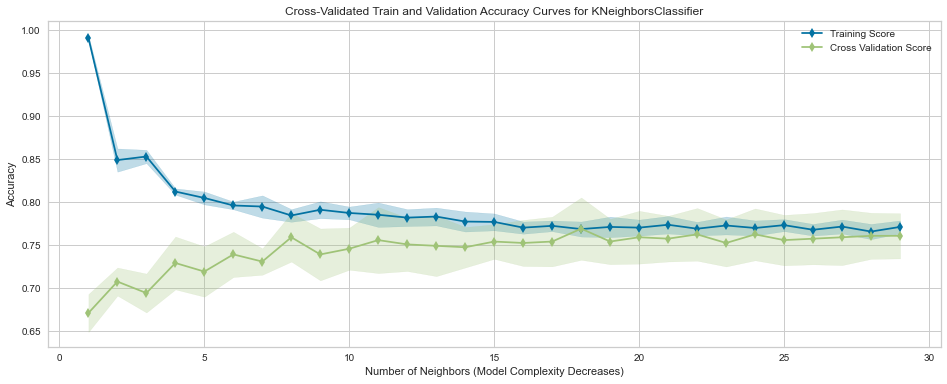

In [64]:
#visualize results
import numpy as np

from yellowbrick.model_selection import ValidationCurve


fig, ax = plt.subplots()

visualizer = ValidationCurve(estimator=knn_pipe, 
                             param_name="kneighborsclassifier__n_neighbors",  
                             param_range=list(range(1, 30)), 
                             cv=kcv_index, 
                             scoring="accuracy", 
                             ax=ax)

# Visualize
visualizer.fit(X_train_val, y_train_val.diabetes)
visualizer.ax.set_title("Cross-Validated Train and Validation Accuracy Curves for KNeighborsClassifier")
visualizer.ax.set_ylabel("Accuracy")
visualizer.ax.set_xlabel("Number of Neighbors (Model Complexity Decreases)")
visualizer.ax.legend().set_visible(True);
#visualizer.show(); #when on:does not return axis labels

A side question: Are we more likely to `overfit` with a low `n_neighbors` or a high `n_neighbors`?

In [65]:
print("Optimum K:", grid_search.best_params_)

Optimum K: {'kneighborsclassifier__n_neighbors': 18}


In [66]:
print("CV Validation Accuracy: %.2f %%" % (grid_search.best_score_*100))

CV Validation Accuracy: 76.88 %


In [67]:
grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=18))])

In [68]:
#Evaluate performance of best KNN on train+val
print("Accuracy on train+val data: %.2f %%" % (grid_search.score(X_train_val, y_train_val)*100))

Accuracy on train+val data: 77.70 %


In [69]:
#Evaluate final performance of best KNN on test
print("Accuracy on test data: %.2f %%" % (grid_search.score(X_test, y_test)*100))

Accuracy on test data: 72.85 %


Our algorithm's predictive accuracy on the test data is 72.85 %.

## Confusion Matrix and Accuracy

We can explicity display how the classifier performed on test data through `confusion matrix`. The confusion matrix involves:

$ $                  | Predicted negative $\hat y=0$  | Predicted positive $\hat y=1$
---------------------|--------------------------------|------------------------------
Negative class $y=0$ | True negative (TN)             | False positive (FP)           
Positive class $y=1$ | False negative (FN)            | True positive (TP)       


- `True Negative (TN):` The actual label and the predicted label are both 0.
- `False Negative (FN):` The actual label is 1, but, the predicted label is 0.
- `False Positive (FP):` The actual label is 0, but, the predicted label is 1.
- `True Positives (TP):` The actual label and the predicted label are both 1.

We can define accuracy as follows:
$$\text{accuracy} = \frac{\text{TN} + \text{TP}}{\text{TN} + \text{FN} + \text{FP} + \text{TP}}$$
This is the number of correction predictions divided by the total number of predictions.

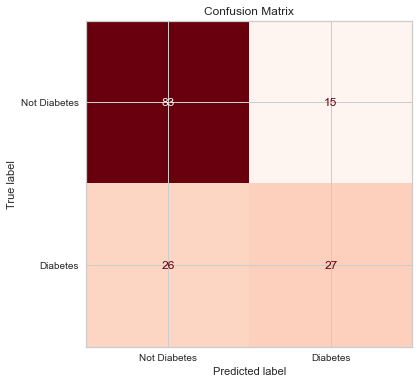

In [70]:
#display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, 
                                           X_test, y_test, 
                                           display_labels=["Not Diabetes","Diabetes"], 
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix");

In [71]:
print("Accuracy %.4f" % ((83+27)/(83+26+15+27)))

Accuracy 0.7285


## Investigating Decision Boundaries for Inspecting Over-fitting & Under-fitting

What happens to decision boundary of KNN classifier when we play around with n_neighbors?

Are we more likely to `overfit` with a low `n_neighbors` or a high `n_neighbors`?

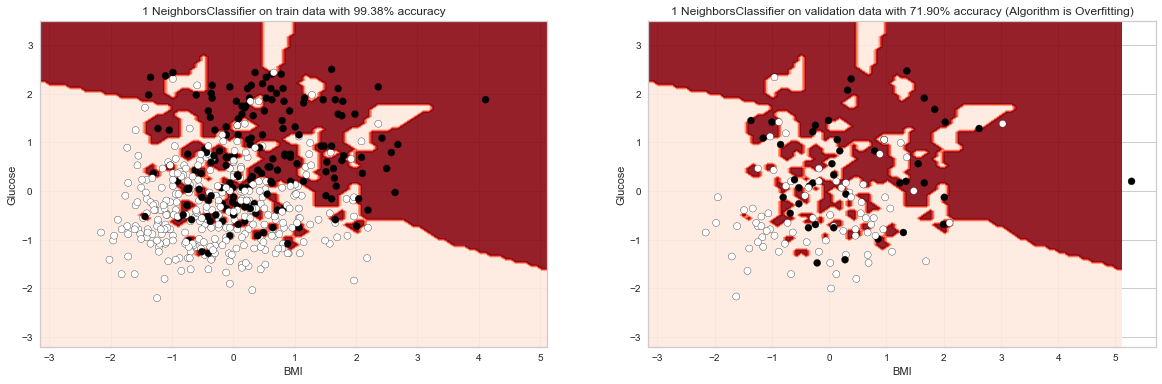

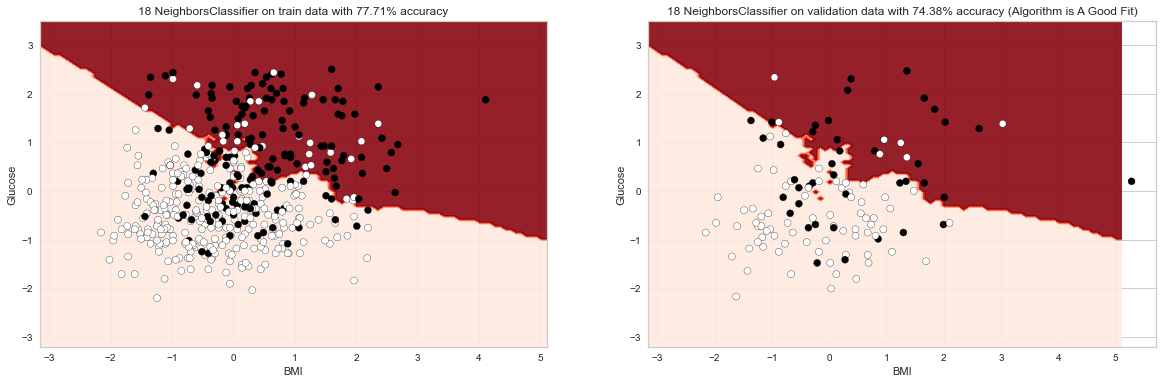

In [72]:
#let's do a quick search
from sklearn import set_config
set_config(transform_output="pandas")  

import pandas as pd 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 6]

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#split the data set as train_val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1773, stratify=y)

#split the data set as train and val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.20, random_state = 1773, stratify=y_train_val)

kneighbor = [1, 18]

#i did not observe under-fitting in this data set
titles = ['Overfitting', 'A Good Fit']


for k in range(len(kneighbor)):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=kneighbor[k], metric='minkowski', p=2)) 
    
    knn_pipe.fit(X_train, y_train.diabetes)
    
    #get accuracy
    train_accuracy = knn_pipe.score(X_train, y_train)
    val_accuracy = knn_pipe.score(X_val, y_val)
    
    #get transformed matrices
    X_train_scaled = knn_pipe[0].fit_transform(X_train)
    X_val_scaled = knn_pipe[0].transform(X_val)

    #left plot:training data on decision boundary
    db = DecisionBoundaryDisplay.from_estimator(
    knn_pipe[1], X_train_scaled, response_method="predict", xlabel="BMI", ylabel="Glucose", ax = ax1, cmap="Reds", alpha=0.9) 
    
    db.ax_.scatter(X_train_scaled.bmi, X_train_scaled.glucose, c=y_train.diabetes, edgecolor="black")
    db.ax_.set_title('%.f NeighborsClassifier on train data with %.2f%% accuracy' % (kneighbor[k], 100*train_accuracy)) #, 
    
    #right plot:validation data on decision boundary (decisioun boundary learning is done over training data)
    db = DecisionBoundaryDisplay.from_estimator(
    knn_pipe[1], X_train_scaled, response_method="predict", xlabel="BMI", ylabel="Glucose", ax = ax2, cmap="Reds", alpha=0.9) 

    db.ax_.scatter(X_val_scaled.bmi, X_val_scaled.glucose, c=y_val.diabetes, edgecolor="black")
    db.ax_.set_title('%.f NeighborsClassifier on validation data with %.2f%% accuracy (Algorithm is %s)' % (kneighbor[k], 100*val_accuracy, titles[k])) 

    plt.show();

- When K = 1, the `decision boundary` is overly `flexible`. This
corresponds `over-fitting`.
- As 𝐾 grows, the method becomes less flexible and produces a `decision boundary` that is close to `linear`. This corresponds to `under-fitting`. (In this example, we do not have under-fitting)
- So, `low values` of K typically `over-fit` and `large values` often `under-fit`.

## References

- James, G., Witten, D., Hastie, T., Tibshirani, R., James, G., Witten, D., and Tibshirani, R. (2021). Statistical learning. An introduction to statistical learning: with applications in R. https://www.statlearning.com/.
- Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: A guide for data scientists. O'Reilly Media, Inc.
- https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/tree/main/notebooks
- https://bradleyboehmke.github.io/HOML/knn.html
- https://stats.stackexchange.com/questions/370531/knn-decision-boundary
- https://github.com/YBI-Foundation/Dataset/blob/main/Diabetes.csv

In [73]:
import session_info
session_info.show()